In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

/Users/ChrisM/anaconda3/lib/python3.6/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/ArrowheadAnalytics/next-gen-scrapy-2.0/master/pass_and_game_data.csv', low_memory=False)
#There's an additional index row we don't need, so I am getting rid of it here
df = df.iloc[0:,1:]

In [3]:
#Drop the games that weren't able to be scraped
df.dropna(inplace=True)
#Explore the data a bit
df.head(3)

,game_id,name,pass_type,team,week,x_coord,y_coord,type,home_team,away_team,season,game_url,home_score,away_score
0,2017091004,Carson Palmer,COMPLETE,ARI,1,-23.5,14.6,reg,DET,ARI,2017,http://www.nfl.com/liveupdate/game-center/2017...,35,23
1,2017091004,Carson Palmer,COMPLETE,ARI,1,2.8,9.3,reg,DET,ARI,2017,http://www.nfl.com/liveupdate/game-center/2017...,35,23
2,2017091004,Carson Palmer,COMPLETE,ARI,1,18.6,-1.1,reg,DET,ARI,2017,http://www.nfl.com/liveupdate/game-center/2017...,35,23


In [27]:
#Get a summary of the numerical data in our dataframe
df.describe()

,game_id,x_coord,y_coord,season,home_score,away_score
count,4.383900e+04,43839.000000,43839.000000,43839.000000,43839.000000,43839.000000
mean,2.018206e+09,0.401437,8.352120,2018.069527,23.654600,22.306827
std,8.202842e+05,15.229154,9.998542,0.825039,10.318057,10.243724
min,2.017091e+09,-28.300000,-10.400000,2017.000000,0.000000,0.000000
25%,2.017122e+09,-12.300000,1.900000,2017.000000,17.000000,16.000000
50%,2.018112e+09,0.900000,5.700000,2018.000000,24.000000,23.000000
75%,2.019101e+09,12.900000,13.100000,2019.000000,31.000000,28.000000
max,2.019123e+09,28.300000,62.100000,2019.000000,57.000000,59.000000


/Users/ChrisM/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


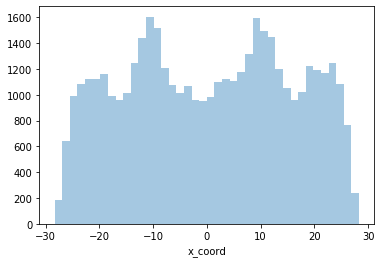

In [9]:
#Let's visualize the distribution of the coordinates
fig = sns.distplot(df.x_coord, kde=False)
plt.show()

/Users/ChrisM/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


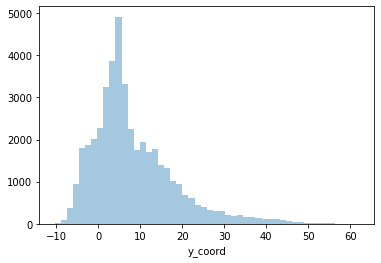

In [10]:
#Now the x coordinate
fig = sns.distplot(df.y_coord, kde=False)
plt.show()

/Users/ChrisM/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


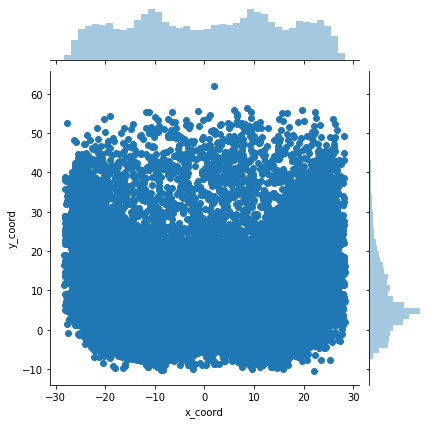

In [11]:
fig = sns.jointplot(x='x_coord', y='y_coord', data=df)
plt.show()

/Users/ChrisM/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


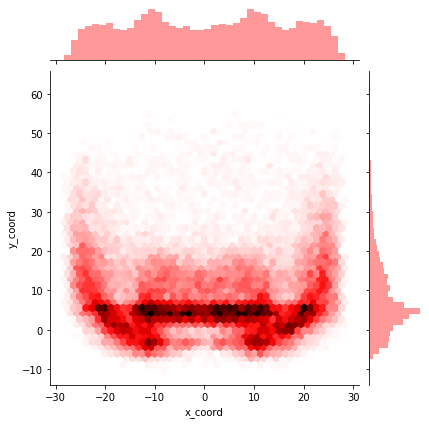

In [12]:
fig = sns.jointplot(x='x_coord', y='y_coord', data=df, kind='hex', color='red')
plt.show()

/Users/ChrisM/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


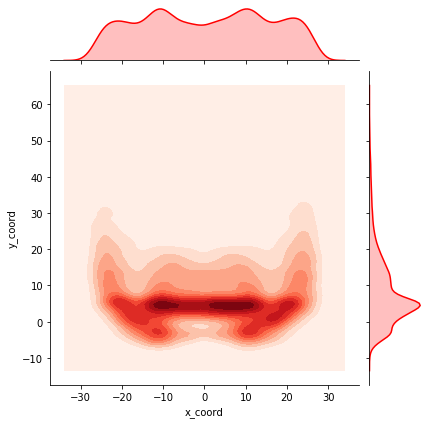

In [13]:
fig = sns.jointplot(x='x_coord', y='y_coord', data=df, kind='kde', cmap='Reds', color='red')
plt.show()

/Users/ChrisM/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


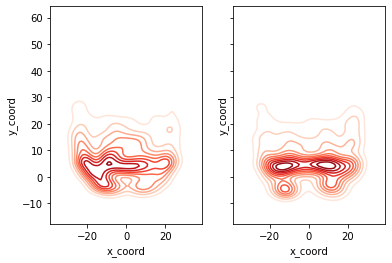

In [14]:
#prepare our two plots - no reason to separate out our axes here as we want to compare these two players on an equal scale so we set sharex and sharey to true
fig, ax =plt.subplots(1,2, sharex=True, sharey=True)

#First, we'll partition the data to the player we are looking for
qb_name = 'Brady' #I'm being intentional vague here and not listing the full player name, because many player names listed on Next Gen Stats are different than you're likely accustomed to. So, I've found this method easire to ensure I get the player data
qb = df.loc[(df['name'].str.contains(qb_name))]
#Assign this plot to the first (0-index) axis. Not going to use the univariate distributions on the axes for these plots as they don't work well as subplots
sns.kdeplot(qb.x_coord, qb.y_coord, ax=ax[0], cmap='Reds')

#Let's get player 2
qb_name = 'Brees'
qb = df.loc[(df['name'].str.contains(qb_name))]
#Second plot
sns.kdeplot(qb.x_coord, qb.y_coord, ax=ax[1], cmap='Reds')
plt.show()

/Users/ChrisM/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


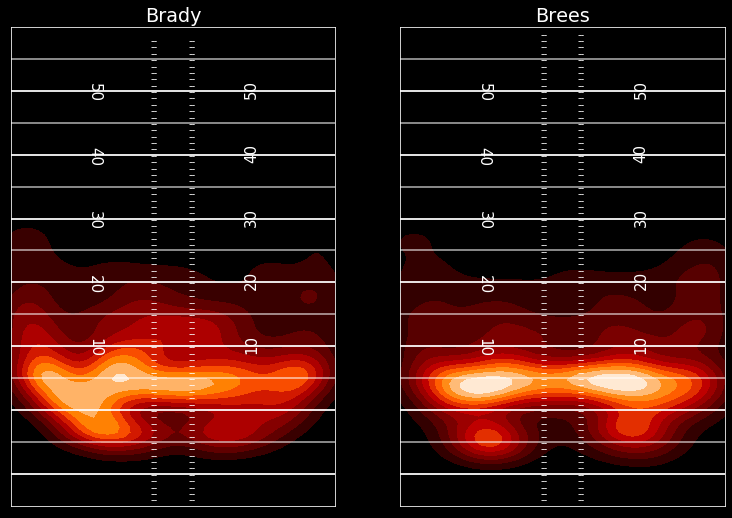

In [19]:
#Layering two plotting styles here to get a big, clean, but dark background look
plt.style.use('seaborn-poster')
plt.style.use('dark_background')

#Set up our subplots
fig, (ax1, ax2) =plt.subplots(1,2)


qb_name = 'Brady'
qb = df.loc[(df['name'].str.contains(qb_name))]

#What we've added here is shading for the densities, but leaving the lowest density area unshaded.
#I've also added the *n_level* parameter, which allows us to choose how many levels we want to have in our contour. The higher the number here, the smoother the plot will look.
sns.kdeplot(qb.x_coord, qb.y_coord, ax=ax1, cmap='gist_heat', shade=True, shade_lowest=False, n_levels=10)

#Set title, remove ticks and labels
ax1.set_title(qb_name)
ax1.set_xlabel('')
ax1.set_xticks([])
ax1.set_yticks([])
ax1.set_ylabel('')

#Remove any part of the plot that is out of bounds
ax1.set_xlim(-53.3333/2, 53.3333/2)
ax1.set_ylim(-15,60)
#This makes our scales (x and y) equal (1 pixel in the x direction is the same 'distance' in coordinates as 1 pixel in the y direction)




#Plot all of the field markings (line of scrimmage, hash marks, etc.)
for j in range(-15,60-1,1):
    ax1.annotate('--', (-3.1,j-0.5),
                 ha='center',fontsize =10)
    ax1.annotate('--', (3.1,j-0.5),
                 ha='center',fontsize =10)
    
for i in range(-10,60,5):
    ax1.axhline(i,c='w',ls='-',alpha=0.7, lw=1.5)
    
for i in range(-10,60,10):
    ax1.axhline(i,c='w',ls='-',alpha=1, lw=1.5)
    
for i in range(10,60-1,10):
    ax1.annotate(str(i), (-12.88,i-1.15),
            ha='center',fontsize =15,
                rotation=270)
    
    ax1.annotate(str(i), (12.88,i-0.65),
            ha='center',fontsize =15,
                rotation=90)


#Now we just repeat for player 2.
qb_name = 'Brees'
qb = df.loc[(df['name'].str.contains(qb_name))]
#Second plot
sns.kdeplot(qb.x_coord, qb.y_coord, ax=ax2, cmap='gist_heat', shade=True, shade_lowest=False, n_levels=10)

ax2.set_title(qb_name)
ax2.set_xlabel('')
ax2.set_ylabel('')
ax2.set_xticks([])
ax2.set_yticks([])
ax2.set_xlim(-53.3333/2, 53.3333/2)
ax2.set_ylim(-15,60)
for j in range(-15,60,1):
    ax2.annotate('--', (-3.1,j-0.5),
                 ha='center',fontsize =10)
    ax2.annotate('--', (3.1,j-0.5),
                 ha='center',fontsize =10)
    
for i in range(-10,60,5):
    ax2.axhline(i,c='w',ls='-',alpha=0.7, lw=1.5)
    
for i in range(-10,60,10):
    ax2.axhline(i,c='w',ls='-',alpha=1, lw=1.5)
    
for i in range(10,60-1,10):
    ax2.annotate(str(i), (-12.88,i-1.15),
            ha='center',fontsize =15,
                rotation=270)
    
    ax2.annotate(str(i), (12.88,i-0.65),
            ha='center',fontsize =15,
                rotation=90)

plt.show()
fig.savefig('heatmap.png')

# Tom brady 2017-2019 seasons

In [33]:
oldest_df = df[df['season'] == 2017]
older_df = df[df['season'] == 2018]
old_df = df[df['season'] == 2019]

/Users/ChrisM/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


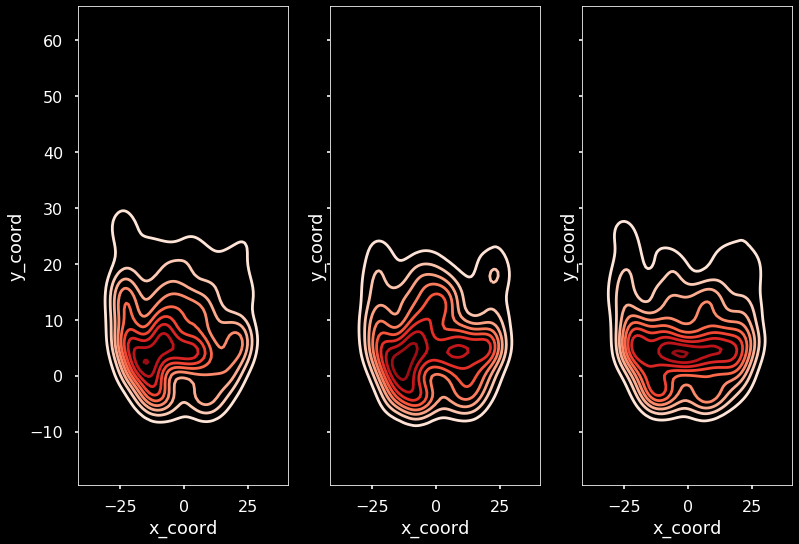

In [36]:
#prepare our two plots - no reason to separate out our axes here as we want to compare these two players on an equal scale so we set sharex and sharey to true
fig, ax =plt.subplots(1,3, sharex=True, sharey=True)

#First, we'll partition the data to the player we are looking for
qb_name = 'Brady' #I'm being intentional vague here and not listing the full player name, because many player names listed on Next Gen Stats are different than you're likely accustomed to. So, I've found this method easire to ensure I get the player data
qb = oldest_df.loc[(oldest_df['name'].str.contains(qb_name))]
#Assign this plot to the first (0-index) axis. Not going to use the univariate distributions on the axes for these plots as they don't work well as subplots
sns.kdeplot(qb.x_coord, qb.y_coord, ax=ax[0], cmap='Reds')

#Let's get player 2
qb_name = 'Brady'
qb = older_df.loc[(older_df['name'].str.contains(qb_name))]
#Second plot
sns.kdeplot(qb.x_coord, qb.y_coord, ax=ax[1], cmap='Reds')

#Let's get player 3
qb_name = 'Brady'
qb = old_df.loc[(old_df['name'].str.contains(qb_name))]
#Second plot
sns.kdeplot(qb.x_coord, qb.y_coord, ax=ax[2], cmap='Reds')
plt.show()

/Users/ChrisM/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


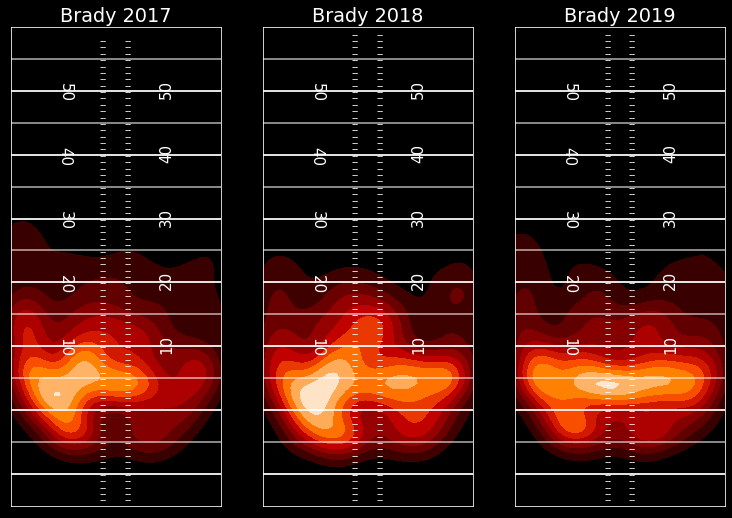

In [43]:
#Layering two plotting styles here to get a big, clean, but dark background look
plt.style.use('seaborn-poster')
plt.style.use('dark_background')

#Set up our subplots
fig, (ax1, ax2, ax3) =plt.subplots(1,3)


qb_name = 'Brady'
qb = oldest_df.loc[(oldest_df['name'].str.contains(qb_name))]

#What we've added here is shading for the densities, but leaving the lowest density area unshaded.
#I've also added the *n_level* parameter, which allows us to choose how many levels we want to have in our contour. The higher the number here, the smoother the plot will look.
sns.kdeplot(qb.x_coord, qb.y_coord, ax=ax1, cmap='gist_heat', shade=True, shade_lowest=False, n_levels=10)

#Set title, remove ticks and labels
ax1.set_title('Brady 2017')
ax1.set_xlabel('')
ax1.set_xticks([])
ax1.set_yticks([])
ax1.set_ylabel('')

#Remove any part of the plot that is out of bounds
ax1.set_xlim(-53.3333/2, 53.3333/2)
ax1.set_ylim(-15,60)
#This makes our scales (x and y) equal (1 pixel in the x direction is the same 'distance' in coordinates as 1 pixel in the y direction)




#Plot all of the field markings (line of scrimmage, hash marks, etc.)
for j in range(-15,60-1,1):
    ax1.annotate('--', (-3.1,j-0.5),
                 ha='center',fontsize =10)
    ax1.annotate('--', (3.1,j-0.5),
                 ha='center',fontsize =10)
    
for i in range(-10,60,5):
    ax1.axhline(i,c='w',ls='-',alpha=0.7, lw=1.5)
    
for i in range(-10,60,10):
    ax1.axhline(i,c='w',ls='-',alpha=1, lw=1.5)
    
for i in range(10,60-1,10):
    ax1.annotate(str(i), (-12.88,i-1.15),
            ha='center',fontsize =15,
                rotation=270)
    
    ax1.annotate(str(i), (12.88,i-0.65),
            ha='center',fontsize =15,
                rotation=90)


#Now we just repeat for player 2.
qb_name = 'Brady'
qb = older_df.loc[(older_df['name'].str.contains(qb_name))]
#Second plot
sns.kdeplot(qb.x_coord, qb.y_coord, ax=ax2, cmap='gist_heat', shade=True, shade_lowest=False, n_levels=10)

ax2.set_title('Brady 2018')
ax2.set_xlabel('')
ax2.set_ylabel('')
ax2.set_xticks([])
ax2.set_yticks([])
ax2.set_xlim(-53.3333/2, 53.3333/2)
ax2.set_ylim(-15,60)
for j in range(-15,60,1):
    ax2.annotate('--', (-3.1,j-0.5),
                 ha='center',fontsize =10)
    ax2.annotate('--', (3.1,j-0.5),
                 ha='center',fontsize =10)
    
for i in range(-10,60,5):
    ax2.axhline(i,c='w',ls='-',alpha=0.7, lw=1.5)
    
for i in range(-10,60,10):
    ax2.axhline(i,c='w',ls='-',alpha=1, lw=1.5)
    
for i in range(10,60-1,10):
    ax2.annotate(str(i), (-12.88,i-1.15),
            ha='center',fontsize =15,
                rotation=270)
    
    ax2.annotate(str(i), (12.88,i-0.65),
            ha='center',fontsize =15,
                rotation=90)

#Now we just repeat for player 3.
qb_name = 'Brady'
qb = old_df.loc[(old_df['name'].str.contains(qb_name))]
#third plot
sns.kdeplot(qb.x_coord, qb.y_coord, ax=ax3, cmap='gist_heat', shade=True, shade_lowest=False, n_levels=10)

ax3.set_title('Brady 2019')
ax3.set_xlabel('')
ax3.set_ylabel('')
ax3.set_xticks([])
ax3.set_yticks([])
ax3.set_xlim(-53.3333/2, 53.3333/2)
ax3.set_ylim(-15,60)
for j in range(-15,60,1):
    ax3.annotate('--', (-3.1,j-0.5),
                 ha='center',fontsize =10)
    ax3.annotate('--', (3.1,j-0.5),
                 ha='center',fontsize =10)
    
for i in range(-10,60,5):
    ax3.axhline(i,c='w',ls='-',alpha=0.7, lw=1.5)
    
for i in range(-10,60,10):
    ax3.axhline(i,c='w',ls='-',alpha=1, lw=1.5)
    
for i in range(10,60-1,10):
    ax3.annotate(str(i), (-12.88,i-1.15),
            ha='center',fontsize =15,
                rotation=270)
    
    ax3.annotate(str(i), (12.88,i-0.65),
            ha='center',fontsize =15,
                rotation=90)


plt.show()
fig.savefig('Tom_Brady_heatmap.png')